# PROJECT 
## <b>Churn Rate Prediction</b>
<img src=" https://retailrocket.net/wp-content/uploads/2021/05/fo-rmula-eng.png" >


# Customer churn prediction using Artificial Neural Network

### what is customer chrun prediction ?
### Churn prediction means detecting which customers are likely to leave a service or to cancel a subscription to a service

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt



In [2]:
df=pd.read_csv('Customer-churn.csv')


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:

df.drop('customerID',axis=1,inplace=True)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

#### to_numeric((to_numeric function converts the argument into integer type from string type ))

In [8]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:

df[ pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]
# coerce error will not consisder the empty string and it gives the correct output

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df.shape

(7043, 20)

In [11]:
df.iloc[488]['TotalCharges']

' '

In [12]:
df[df.TotalCharges!=' '].shape

(7032, 20)

#### Remove rows with space in TotalCharges

In [13]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

/Users/kushwanthbhukya/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [17]:
df1.TotalCharges.values.dtype

dtype('float64')

In [18]:
df1.TotalCharges.value_counts

<bound method IndexOpsMixin.value_counts of 0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64>

In [19]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [20]:
df1[df1.Churn=='No'].count()

gender              5163
SeniorCitizen       5163
Partner             5163
Dependents          5163
tenure              5163
PhoneService        5163
MultipleLines       5163
InternetService     5163
OnlineSecurity      5163
OnlineBackup        5163
DeviceProtection    5163
TechSupport         5163
StreamingTV         5163
StreamingMovies     5163
Contract            5163
PaperlessBilling    5163
PaymentMethod       5163
MonthlyCharges      5163
TotalCharges        5163
Churn               5163
dtype: int64

In [21]:
df1.Churn.count

<bound method Series.count of 0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object>

In [22]:
7042-5163

1879

In [23]:
# 1879 people are changed there work place

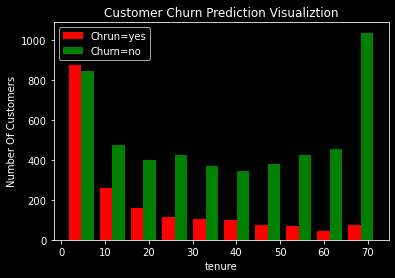

In [24]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")



plt.hist([tenure_churn_yes,tenure_churn_no],color=['red','green'],label=['Chrun=yes','Churn=no'])
plt.legend()

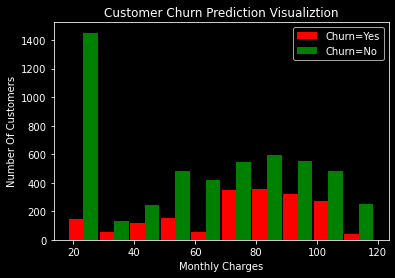

In [25]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

# Printing the unique values for all categorical columns

### Many of the columns are yes, no etc. Let's print unique values in object columns to see data values

In [26]:
def print_unique_values(df1):
    for column in df1:
        if df[column].dtypes=='object':
            print(f"{column}:{df[column].unique()}")


In [27]:
print_unique_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


In [28]:

#These are the values in the data frames

In [29]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

/Users/kushwanthbhukya/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [30]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [31]:
print_unique_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


#### converting yes or no to  1 to 0

In [32]:
yes_no_column=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_column:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

/Users/kushwanthbhukya/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [33]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [34]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [35]:
df1.gender.unique()


array([1, 0])

In [36]:
df1.gender.dtype

dtype('int64')

#### One hot encoding for categorical columns

In [37]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [38]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2030,0,0,0,1,2,1,1,1,1,0,...,1,0,0,1,0,0,1,0,0,0
4411,1,0,1,0,57,0,0,1,0,1,...,1,0,0,1,0,0,1,0,0,0
6239,0,0,1,0,72,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2240,1,1,1,1,72,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0
6155,0,0,1,0,5,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [39]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [40]:
df2.head().T

,0,1,2,3,4
gender,1.00,0.00,0.00,0.00,1.00
SeniorCitizen,0.00,0.00,0.00,0.00,0.00
Partner,1.00,0.00,0.00,0.00,0.00
Dependents,0.00,0.00,0.00,0.00,0.00
tenure,1.00,34.00,2.00,45.00,2.00
PhoneService,0.00,1.00,1.00,0.00,1.00
MultipleLines,0.00,0.00,0.00,0.00,0.00
OnlineSecurity,0.00,1.00,1.00,1.00,0.00
OnlineBackup,1.00,0.00,1.00,0.00,0.00
DeviceProtection,0.00,1.00,0.00,1.00,0.00


#### HERE TENTURE MONTHLY CHARGES AND TOTAL CHARGES ARE NOT IN RANGE OF 0 TO 1 SO WE NEED TO SCALE IT BEFORE DOING  DEEP LEARNING ANN(ARTIFICIAL NEURAL NETWORK) 

In [41]:
col_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler=MinMaxScaler()
df2[col_to_scale]=scaler.fit_transform(df2[col_to_scale])

In [43]:
df2.head().T

,0,1,2,3,4
gender,1.000000,0.000000,0.000000,0.000000,1.000000
SeniorCitizen,0.000000,0.000000,0.000000,0.000000,0.000000
Partner,1.000000,0.000000,0.000000,0.000000,0.000000
Dependents,0.000000,0.000000,0.000000,0.000000,0.000000
tenure,0.000000,0.464789,0.014085,0.619718,0.014085
PhoneService,0.000000,1.000000,1.000000,0.000000,1.000000
MultipleLines,0.000000,0.000000,0.000000,0.000000,0.000000
OnlineSecurity,0.000000,1.000000,1.000000,1.000000,0.000000
OnlineBackup,1.000000,0.000000,1.000000,0.000000,0.000000
DeviceProtection,0.000000,1.000000,0.000000,1.000000,0.000000


In [44]:
# NOW EVERYTHING IS IN RANGE OF 0 TO 1 SO NOW WE CAN EASILY START TRAIN TESGT SPLIT

In [45]:
for col in df2:
    print(f"{col}: {df2[col].unique()}")

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

### Train test split method

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x=df2.drop('Churn',axis=1)
y=df2['Churn']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)


In [48]:
x_train.shape

(5625, 26)

In [49]:
x_test.shape

(1407, 26)

In [50]:
y_train.shape

(5625,)

In [51]:
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [52]:
len(x_train.columns)

26

## Building a model of  Artificial neural network  in tensorflow/keras

In [53]:
import tensorflow as tf
from tensorflow import keras


Init Plugin
Init Graph Optimizer
Init Kernel


In [54]:
model= keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,)),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## why do we use binary_crossentropy function as loss function ?
# becuase we are dealing with the values in the range of 0 to 1 so we use binary crossentropy function
# we use binary crossentropy function for 0 or 1 values only.



model.fit(x_train,y_train,epochs=100)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-08-10 00:44:16.892431: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-10 00:44:16.892886: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-08-10 00:44:17.907299: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-10 00:44:17.910617: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


2022-08-10 00:44:18.161690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


176/176 [==============================] - 6s 11ms/step - loss: 0.4579 - accuracy: 0.7758
Epoch 2/100
176/176 [==============================] - 2s 11ms/step - loss: 0.4174 - accuracy: 0.8055
Epoch 3/100
176/176 [==============================] - 2s 10ms/step - loss: 0.4118 - accuracy: 0.8064
Epoch 4/100
176/176 [==============================] - 2s 11ms/step - loss: 0.4095 - accuracy: 0.8087
Epoch 5/100
176/176 [==============================] - 2s 11ms/step - loss: 0.4060 - accuracy: 0.8107
Epoch 6/100
176/176 [==============================] - 2s 11ms/step - loss: 0.4045 - accuracy: 0.8105
Epoch 7/100
176/176 [==============================] - 2s 10ms/step - loss: 0.4034 - accuracy: 0.8117
Epoch 8/100
176/176 [==============================] - 2s 10ms/step - loss: 0.4008 - accuracy: 0.8117
Epoch 9/100
176/176 [==============================] - 2s 10ms/step - loss: 0.3989 - accuracy: 0.8123
Epoch 10/100
176/176 [==============================] - 2s 11ms/step - loss: 0.3983 - accuracy

### result form epochs 
#### 1. loss value is =0.3815
#### 2. accuracy value is =0.8228


In [55]:
model.evaluate(x_test,y_test)

11/44 [======>.......................] - ETA: 0s - loss: 0.5560 - accuracy: 0.7784 

2022-08-10 00:48:28.096623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 1s 5ms/step - loss: 0.6078 - accuracy: 0.7456


[0.6077950596809387, 0.745557963848114]

In [56]:
y_predictions =model.predict(x_test)
y_predictions[:50]

2022-08-10 00:48:28.515277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[1.7398919e-01],
       [7.1590841e-01],
       [9.1554224e-04],
       [6.1272329e-01],
       [4.2561147e-01],
       [9.7179574e-01],
       [9.5355872e-04],
       [1.4798418e-01],
       [2.5764915e-01],
       [7.0930618e-01],
       [2.1896608e-01],
       [6.9987804e-01],
       [1.1383397e-01],
       [2.2957429e-01],
       [5.6722820e-01],
       [1.3518114e-01],
       [4.3172203e-03],
       [5.1859784e-01],
       [6.5868911e-03],
       [1.4590441e-01],
       [2.6091706e-04],
       [1.0595840e-01],
       [8.5731745e-02],
       [2.3954189e-03],
       [5.8033913e-03],
       [2.1789011e-01],
       [2.7506717e-03],
       [3.0500457e-01],
       [3.2759896e-01],
       [2.7256383e-04],
       [3.0948520e-01],
       [7.5994974e-01],
       [1.1510151e-03],
       [1.7083782e-03],
       [9.4731993e-05],
       [3.5546055e-01],
       [9.1339654e-01],
       [6.2808216e-02],
       [9.2774296e-01],
       [3.2220080e-01],
       [5.6954288e-01],
       [7.427198

### converting the y_prediction array  values  to o to 1

In [57]:
y_pred = []
for element in y_predictions:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [58]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 1]

In [59]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

### Creating a confusion matrix 

Text(69.0, 0.5, 'Truth')

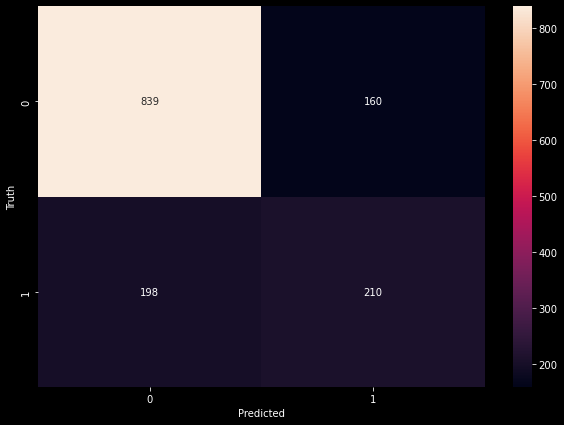

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Explanation of confusion matrix

In [61]:
prediction_0=874+182
prediction_1= 125+226


print(prediction_0,prediction_1)

1056 351


# CONCLUSION OF CONFUSION MATRIX

### In confuison matrix the diagonal values are correct
1. total number of predictions of 0 are =1056
1. total number of predictions of 1 are =351
3. correct prediction of o are =874
4. wrong prediction of o are =182
5. correct prediction of 1 are =226
4. wrong prediction of 1 are =125



In [62]:
y_test.shape

(1407,)

### Precision for 0 class. i.e. Precision for customers who did not churn

In [63]:
round((874/1056),3)

0.828

#### Precision for 0 class. i.e. Precision for customers who did not churn is = 0.828


#### Precision for 1 class. i.e. Precision for customers who actually churned

In [64]:

round((226/351),3)

0.644

In [66]:
from sklearn.metrics import classification_report



In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       999
           1       0.57      0.51      0.54       408

    accuracy                           0.75      1407
   macro avg       0.69      0.68      0.68      1407
weighted avg       0.74      0.75      0.74      1407



#### Precision for 1 class. i.e. Precision for customers who actually churned is = 0.644
